In [1]:
import pandas as pd

df = pd.read_csv('temperature.csv', encoding='cp949') # cp949 == ms949 == euc-kr
df.head()
df.tail()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       364 non-null    float64
 5   최저기온 시각(hhmi)  364 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


In [2]:
# df2 = df.fillna(method='ffill')
df2 = df.bfill()
df2.iloc[218:221, :]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
218,108,서울,2022-08-07,28.9,27.2,354.0,31.7,1421
219,108,서울,2022-08-08,26.8,22.0,2354.0,28.4,1
220,108,서울,2022-08-09,25.1,22.0,2354.0,26.5,1538


In [3]:
df2.rename(columns={'최저기온(°C)': 'min_temp'}, inplace=True)
df2.rename(columns={'평균기온(°C)': 'avg_temp'}, inplace=True)
df2.rename(columns={'최고기온(°C)': 'max_temp'}, inplace=True)
df2

,지점,지점명,일시,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542
3,108,서울,2022-01-04,-2.5,-5.6,2400.0,1.0,1445
4,108,서울,2022-01-05,-2.8,-7.8,634.0,1.9,1518
...,...,...,...,...,...,...,...,...
360,108,서울,2022-12-27,-2.6,-7.3,720.0,3.3,1515
361,108,서울,2022-12-28,-3.3,-6.0,2355.0,0.1,1453
362,108,서울,2022-12-29,-2.9,-7.8,728.0,2.1,1522
363,108,서울,2022-12-30,-1.8,-4.4,2355.0,2.3,1354


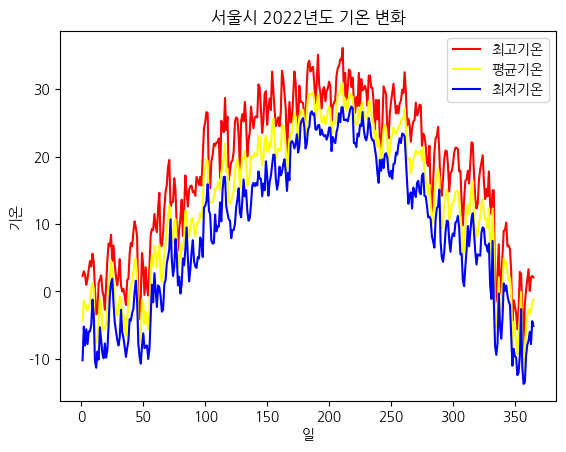

In [4]:
# 꺾은선 그래프
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

plt.title('서울시 2022년도 기온 변화')
plt.plot(range(1, len(df2) + 1), df2['max_temp'], label='최고기온', color='red')
plt.plot(range(1, len(df2) + 1), df2['avg_temp'], label='평균기온', color='yellow')
plt.plot(range(1, len(df2) + 1), df2['min_temp'], label='최저기온', color='blue')
plt.xlabel('일')
plt.ylabel('기온')
plt.legend()
plt.show()

In [5]:
df2['일시'] = pd.to_datetime(df2['일시'], format='%Y-%m-%d')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             365 non-null    int64         
 1   지점명            365 non-null    object        
 2   일시             365 non-null    datetime64[ns]
 3   avg_temp       365 non-null    float64       
 4   min_temp       365 non-null    float64       
 5   최저기온 시각(hhmi)  365 non-null    float64       
 6   max_temp       365 non-null    float64       
 7   최고기온 시각(hhmi)  365 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 22.9+ KB


In [6]:
df3 = df2.set_index('일시')
df3

,지점,지점명,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
일시,,,,,,,
2022-01-01,108,서울,-4.3,-10.2,710.0,2.3,1544
2022-01-02,108,서울,-1.3,-5.2,2356.0,3.0,1551
2022-01-03,108,서울,-1.9,-8.0,714.0,2.5,1542
2022-01-04,108,서울,-2.5,-5.6,2400.0,1.0,1445
2022-01-05,108,서울,-2.8,-7.8,634.0,1.9,1518
...,...,...,...,...,...,...,...
2022-12-27,108,서울,-2.6,-7.3,720.0,3.3,1515
2022-12-28,108,서울,-3.3,-6.0,2355.0,0.1,1453
2022-12-29,108,서울,-2.9,-7.8,728.0,2.1,1522


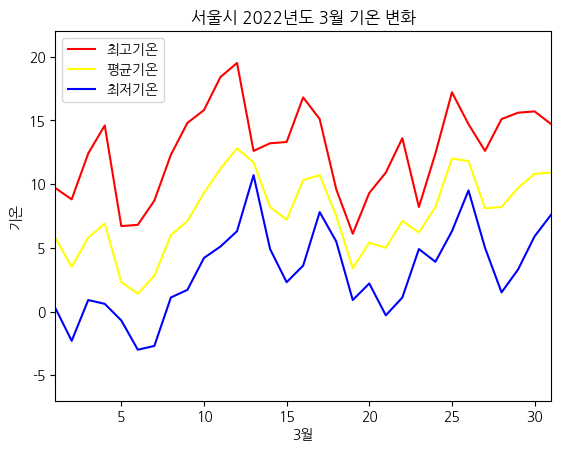

In [7]:
df_march = df3[pd.DatetimeIndex(df3.index).month == 3]

plt.title('서울시 2022년도 3월 기온 변화')
plt.plot(range(1, 32), df_march['max_temp'], label='최고기온', color='red')
plt.plot(range(1, 32), df_march['avg_temp'], label='평균기온', color='yellow')
plt.plot(range(1, 32), df_march['min_temp'], label='최저기온', color='blue')

plt.xlabel('3월')
plt.ylabel('기온')
plt.xlim(1, 31)
plt.ylim(-7, 22)
plt.legend()
plt.rcParams['figure.figsize'] = (100, 200)

plt.savefig('서울.png')
plt.show()